# Demo Entregable 3: Identificador de Narices

## Cargando data de entrenamiento

In [2]:
matrices = os.listdir(cfg.params['MATRICES_PATH'])
matrices.sort()
tgt_name = matrices[-1]
data = np.load(cfg.params['MATRICES_PATH']+tgt_name)

## Creando el identificador

In [3]:
nn = build_nn(data)

## Identificando

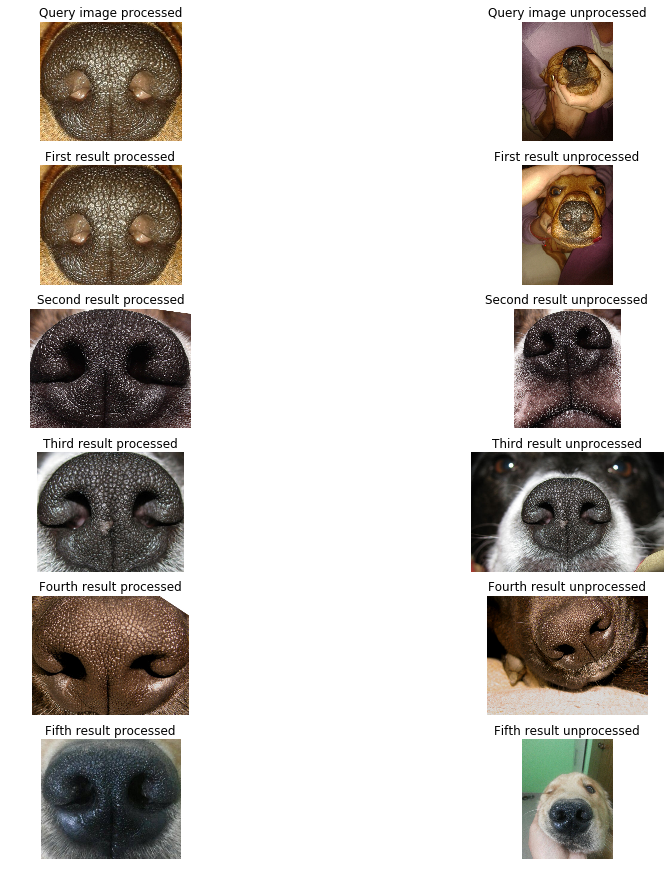

In [51]:
query('img0.jpg', nn)

## Configuración del Notebook

In [1]:
%matplotlib inline
import os
import histogram
import numpy as np
import cv2 as cv
import cPickle as pickle
import config as cfg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from builder import build_svm, build_nn
from helpers import data_to_hist, data_to_lbp
from skimage.feature import local_binary_pattern as lbp

In [41]:
def query(image, nn):
    #load mapping
    tgt = open(cfg.params['VAULT']+'mappings', 'rb')
    mappings = pickle.load(tgt)
    tgt.close()
    
    #loading image
    img = cv.imread(cfg.params['TEST_PATH']+image, cv.IMREAD_GRAYSCALE)
    lbp_image = lbp(img, cfg.params['P'], cfg.params['R'], cfg.params['LBP_METHOD'])
    lbp_image = lbp_image.astype(np.uint8)
    query_hist = histogram.spatial(lbp_image, cfg.params['NX'], cfg.params['NY'],
                 cfg.params['NPATTERNS'], cfg.params['OVERLAPX'], cfg.params['OVERLAPY'])
    dist, ind = nn.query([query_hist], 5)
    
    names = [mappings[i] for i in ind[0]]

    root = '/home/martin/MEGA/SafePet/SafePetData/'
    
    #load query image
    q_img = mpimg.imread(cfg.params['TEST_PATH']+image)
    q_img_complete = mpimg.imread(root+'test_unprocessed/'+image)

    #load results images
    r_img1 = mpimg.imread(cfg.params['TRAINING_PATH']+names[0], cv.IMREAD_COLOR)
    r_img1_complete = mpimg.imread(root+'train_unprocessed/'+names[0])

    r_img2 = mpimg.imread(cfg.params['TRAINING_PATH']+names[1], cv.IMREAD_COLOR)
    r_img2_complete = mpimg.imread(root+'train_unprocessed/'+names[1])
    
    r_img3 = mpimg.imread(cfg.params['TRAINING_PATH']+names[2], cv.IMREAD_COLOR)
    r_img3_complete = mpimg.imread(root+'train_unprocessed/'+names[2])
    
    r_img4 = mpimg.imread(cfg.params['TRAINING_PATH']+names[3], cv.IMREAD_COLOR)
    r_img4_complete = mpimg.imread(root+'train_unprocessed/'+names[3])
    
    r_img5 = mpimg.imread(cfg.params['TRAINING_PATH']+names[4], cv.IMREAD_COLOR)
    r_img5_complete = mpimg.imread(root+'train_unprocessed/'+names[4])

    #visualization
    fig = plt.figure(figsize=(15,15))

    fig.add_subplot(6,2,1)
    plt.axis('off')
    plt.title('Query image processed')
    plt.imshow(q_img)

    fig.add_subplot(6,2,2)
    plt.axis('off')
    plt.title('Query image unprocessed')
    plt.imshow(q_img_complete)

    fig.add_subplot(6,2,3)
    plt.axis('off')
    plt.title('First result processed')
    plt.imshow(r_img1)

    fig.add_subplot(6,2,4)
    plt.axis('off')
    plt.title('First result unprocessed')
    plt.imshow(r_img1_complete)

    fig.add_subplot(6,2,5)
    plt.axis('off')
    plt.title('Second result processed')
    plt.imshow(r_img2)

    fig.add_subplot(6,2,6)
    plt.axis('off')
    plt.title('Second result unprocessed')
    plt.imshow(r_img2_complete)
    
    fig.add_subplot(6,2,7)
    plt.axis('off')
    plt.title('Third result processed')
    plt.imshow(r_img3)

    fig.add_subplot(6,2,8)
    plt.axis('off')
    plt.title('Third result unprocessed')
    plt.imshow(r_img3_complete)
    
    fig.add_subplot(6,2,9)
    plt.axis('off')
    plt.title('Fourth result processed')
    plt.imshow(r_img4)

    fig.add_subplot(6,2,10)
    plt.axis('off')
    plt.title('Fourth result unprocessed')
    plt.imshow(r_img4_complete)
    
    fig.add_subplot(6,2,11)
    plt.axis('off')
    plt.title('Fifth result processed')
    plt.imshow(r_img5)

    fig.add_subplot(6,2,12)
    plt.axis('off')
    plt.title('Fifth result unprocessed')
    plt.imshow(r_img5_complete)

    plt.show()

In [44]:
data_to_hist(cfg.params['TRAINING_PATH'], cfg.params['MATRICES_PATH'])

1